In [1]:
import sys 
sys.path.append('../../')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit.algorithms.optimizers import SPSA
from qnn.quantum_neural_networks import StateDiscriminativeQuantumNeuralNetworks as nnd
from qnn.quantum_state import QuantumState 

In [2]:
def callback( params, results, prob_error, prob_inc, prob):
    data.append([prob,prob_error,prob_inc]) 

In [3]:
# Create random states
ψ = QuantumState.random(1)
ϕ = QuantumState.random(1)

# Parameters
th_u, fi_u, lam_u = [0], [0], [0]
th1, th2 = 2 * [0], 2 * [pi]
th_v1, th_v2 = 2 * [0], 2 * [0]
fi_v1, fi_v2 = 2 * [0], 2 * [0]
lam_v1, lam_v2 = 2 * [0], 2 * [0]
params = list(itertools.chain(th_u, fi_u, lam_u, th1, th2, th_v1, th_v2, fi_v1, fi_v2, lam_v1, lam_v2))

# Initialize Discriminator
α_err = 0.8
α_inc = 0.2
discriminator = nnd([ψ, ϕ], True, α_err, α_inc)

data = []
results = discriminator.discriminate(SPSA(100), params, callback=callback)

print(f'Results: {results}')

Results: (array([-15.08493677,  -2.66430837,   1.71737777,  -3.11370998,
        -9.68403588,   0.33098247,   3.05682468,  10.60559748,
        12.89985841,  -3.73974034,   5.68449446,   3.09083622,
        -7.50700111,  11.56741951,  -0.85070785,  -5.87869012,
         7.87547183,  -0.49465627,   4.61378075]), 0.18349609375, 200)


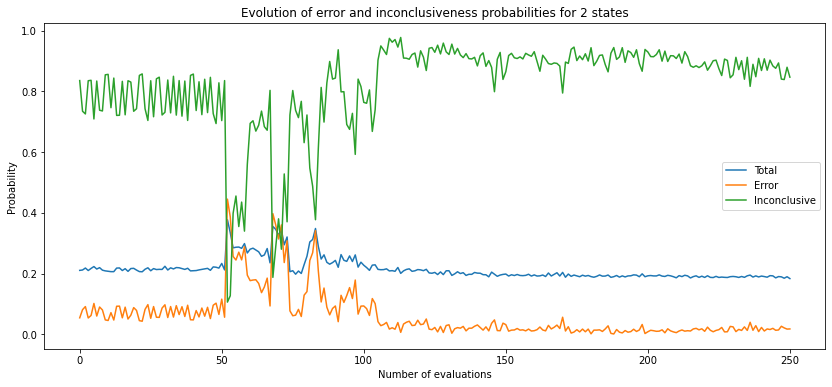

In [7]:
fig = plt.figure(figsize=(14, 6))
plt.plot(data, '-')
plt.xlabel('Number of evaluations')
plt.ylabel('Probability')
plt.legend(['Total', 'Error', 'Inconclusive'])
plt.title('Evolution of error and inconclusiveness probabilities for 2 states')
plt.show()

In [4]:
th_u, fi_u, lam_u = results[0][:3]
th1 = results[0][3:5]
th2 = results[0][5:7]
th_v1 = results[0][7:9]
th_v2 = results[0][9:11]
fi_v1 = results[0][11:13]
fi_v2 = results[0][13:15]
lam_v1 = results[0][15:17]
lam_v2 = results[0][17:19]

In [5]:
M = nnd.povm( 3,
             [th_u], [fi_u], [lam_u],
             th1, th2,
             th_v1, th_v2,
             fi_v1, fi_v2,
             lam_v1, lam_v2, output='povm' )
sphere = nnd.plot_bloch_sphere( M , [ψ, ϕ] )

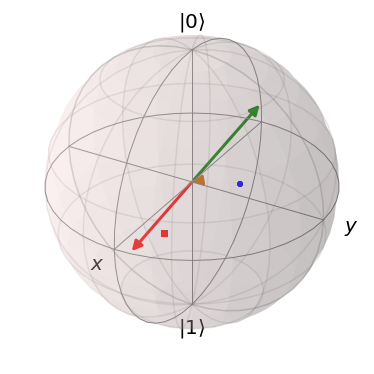

In [8]:
sphere.render()
plt.savefig('sphere_inc')